In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## The Data

<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


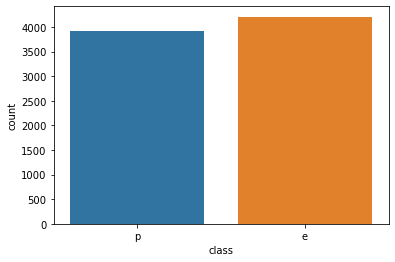

In [3]:
sns.countplot(data=df,x='class');

In [7]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

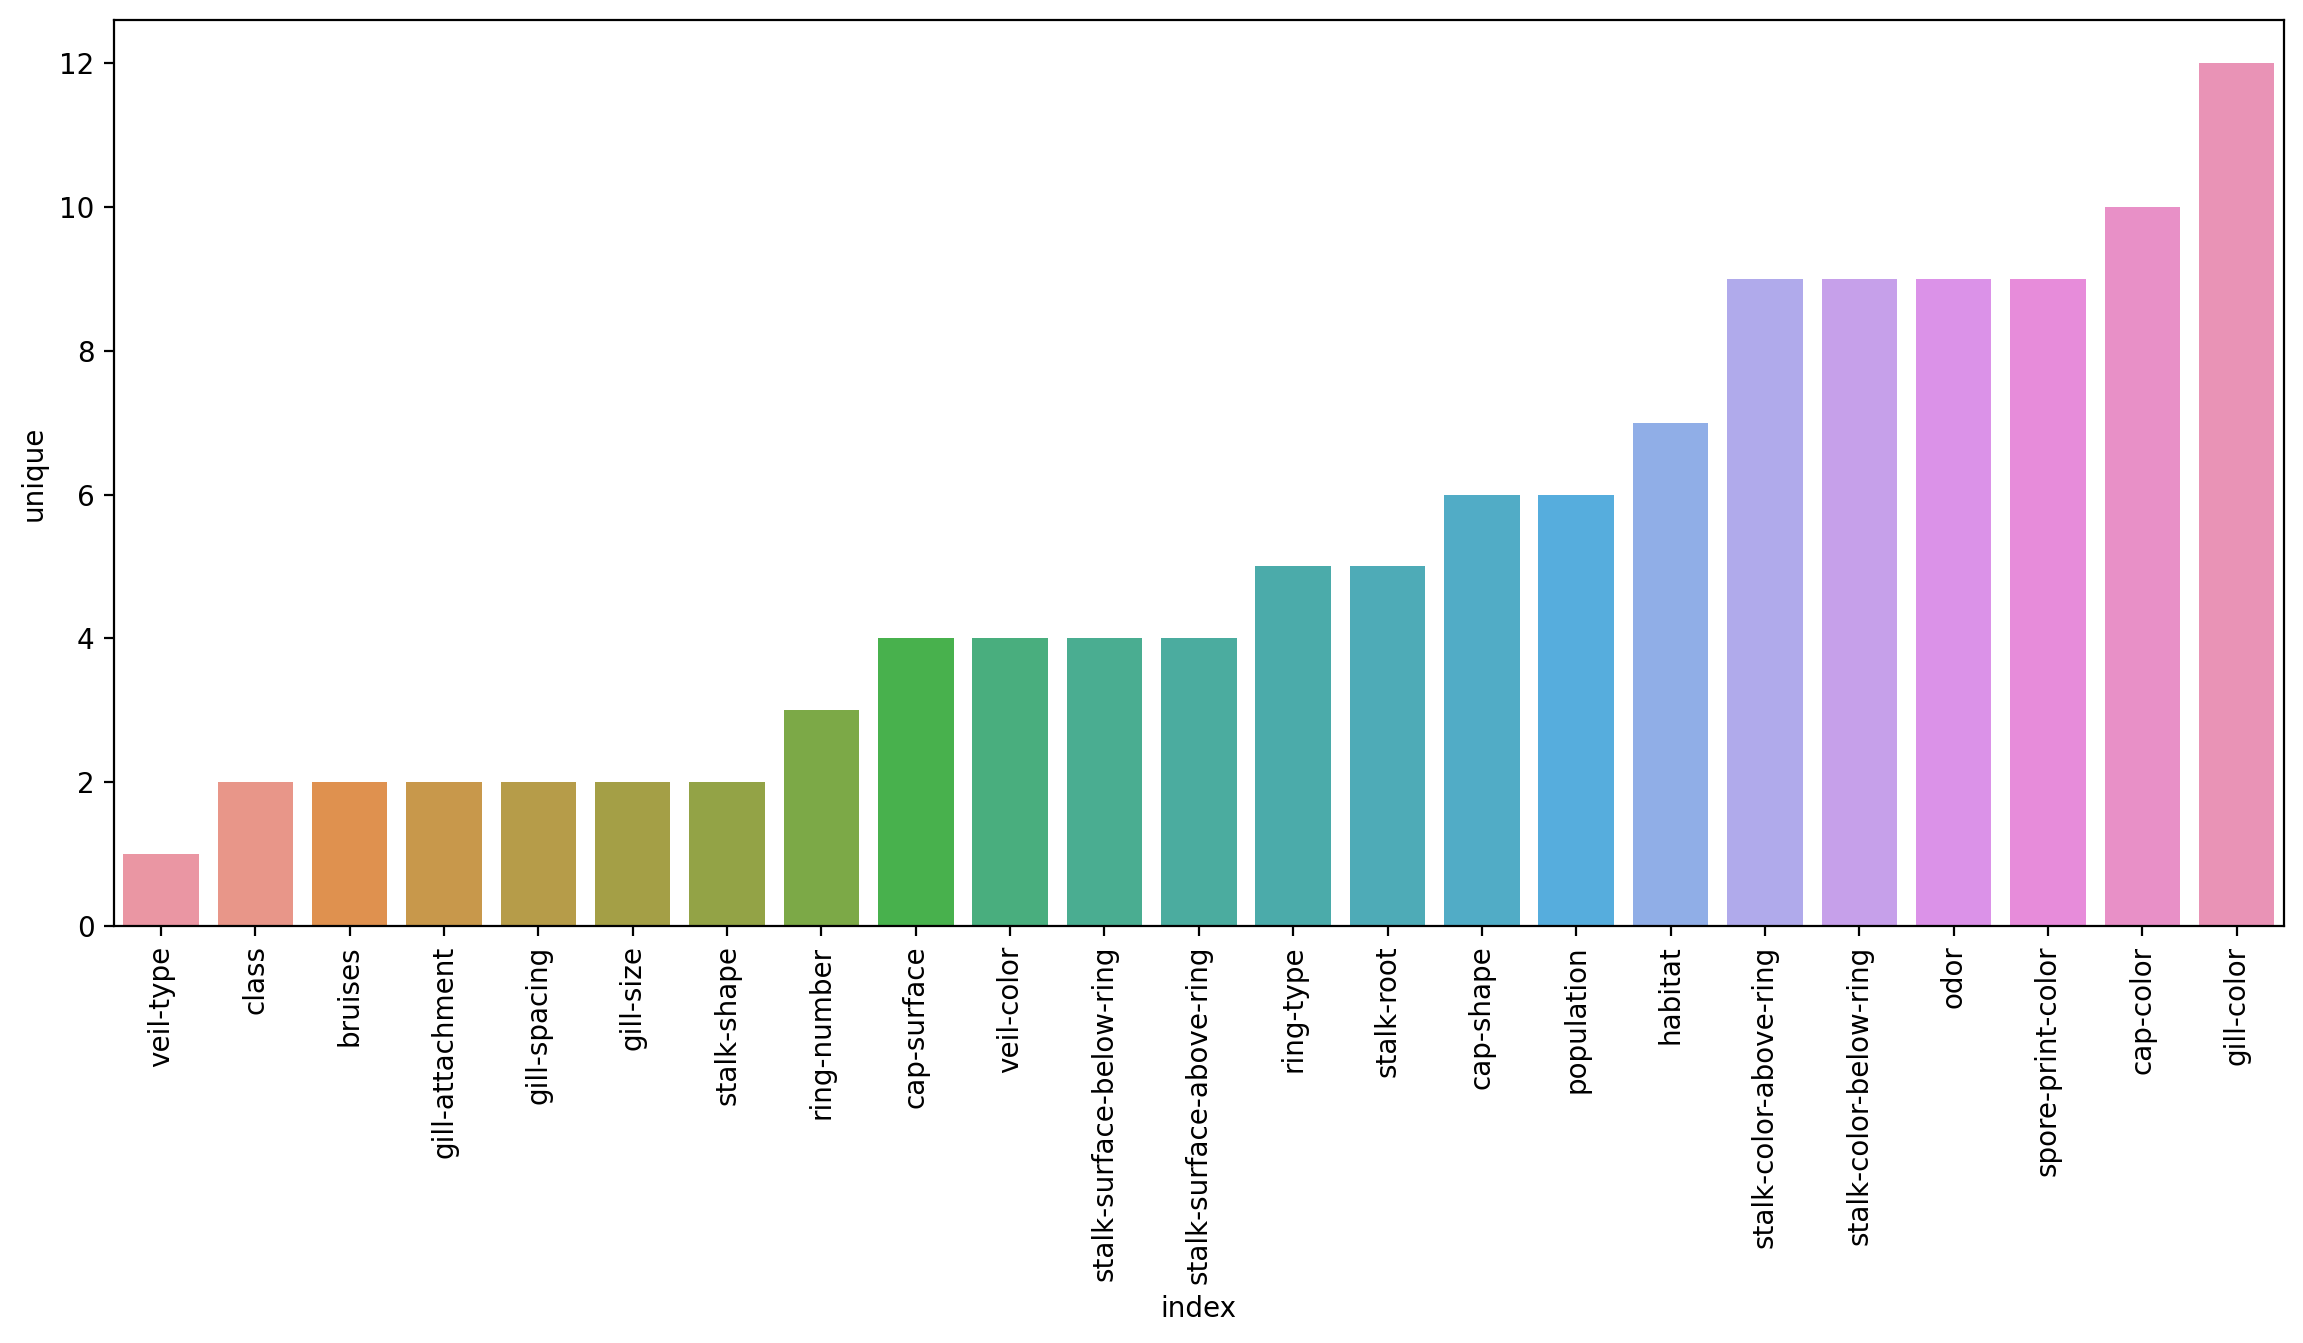

In [12]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90);

In [13]:
X = pd.get_dummies(df.drop(columns='class'), drop_first=True)
y = df['class']

In [28]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [31]:
pd.DataFrame(data = model.feature_importances_, index = X.columns, columns = ['Feature Importances']).sort_values('Feature Importances', ascending=False)

,Feature Importances
odor_n,0.160823
gill-size_n,0.097972
odor_f,0.072921
stalk-surface-above-ring_k,0.065750
bruises_t,0.045367
...,...
cap-color_u,0.000091
spore-print-color_y,0.000000
spore-print-color_o,0.000000
veil-color_o,0.000000


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [40]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
model.feature_importances_.argmax()

22

In [23]:
X.columns[22]

'odor_n'

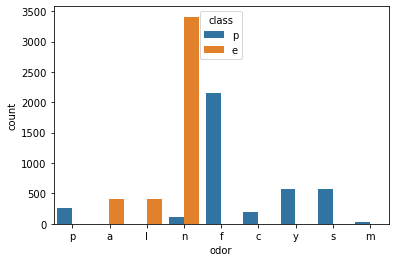

In [26]:
sns.countplot(data=df,x='odor',hue='class');

In [42]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    error = 1 - accuracy_score(y_test,y_pred)
    error_rates.append(error)

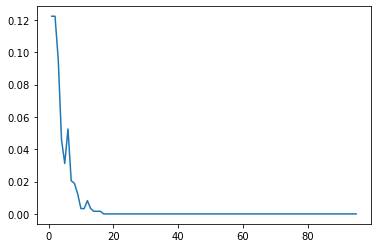

In [43]:
plt.plot(range(1,96), error_rates)

In [63]:
model

AdaBoostClassifier(n_estimators=95)

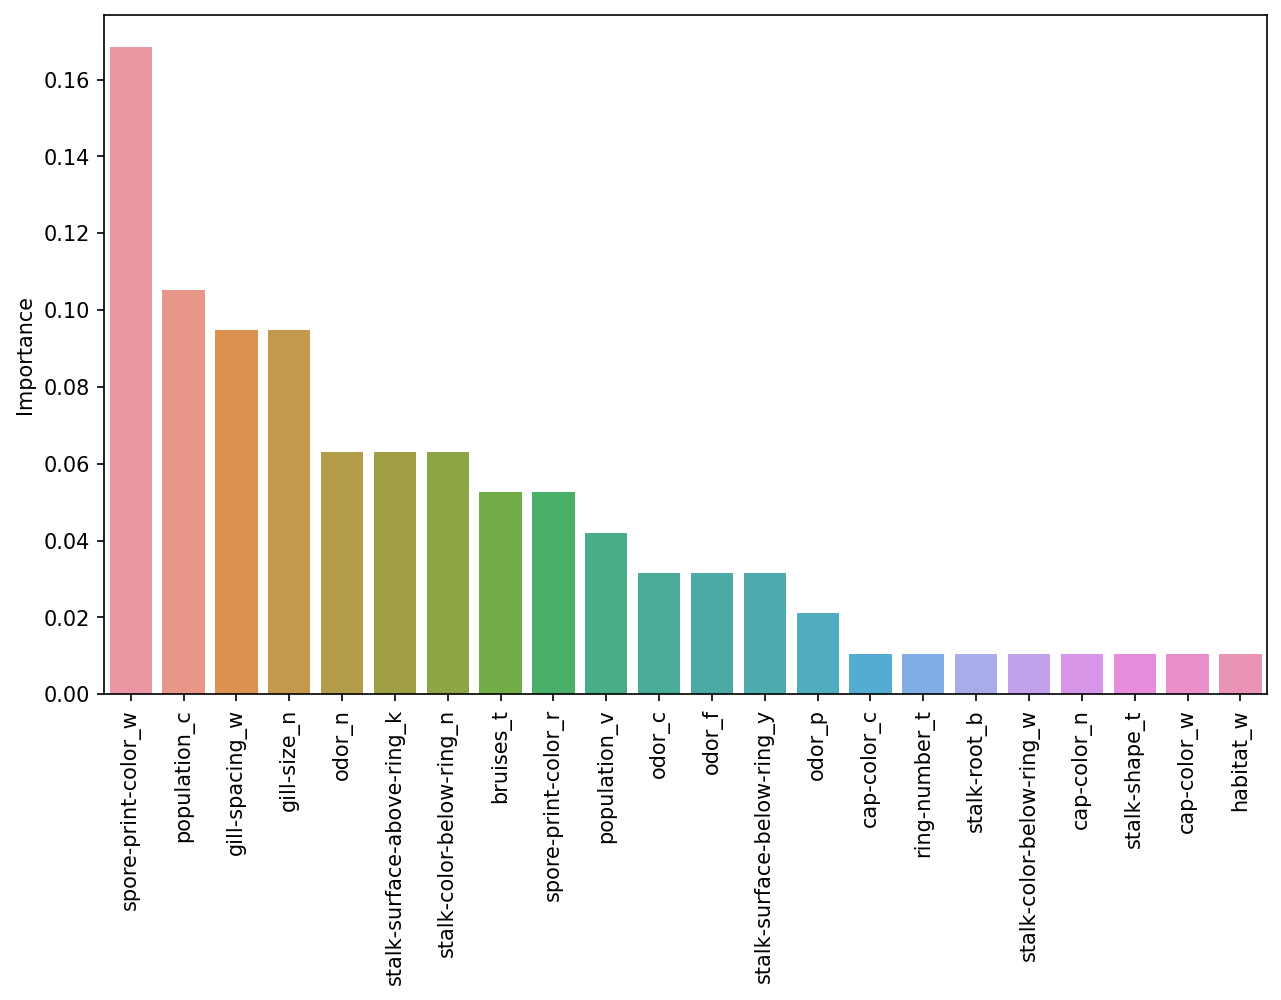

In [62]:
# Criando um DataFrame com as features escolhidas pelo AdaBoost dado n_estimator máximo
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['Importance'])
imp_feats = feats[feats['Importance']>0].sort_values('Importance', ascending=False)

# Plotando a importancia das features
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

In [64]:
# Seguindo o plot, rodando o modelo com 18 estimadores
model = AdaBoostClassifier(n_estimators=18)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



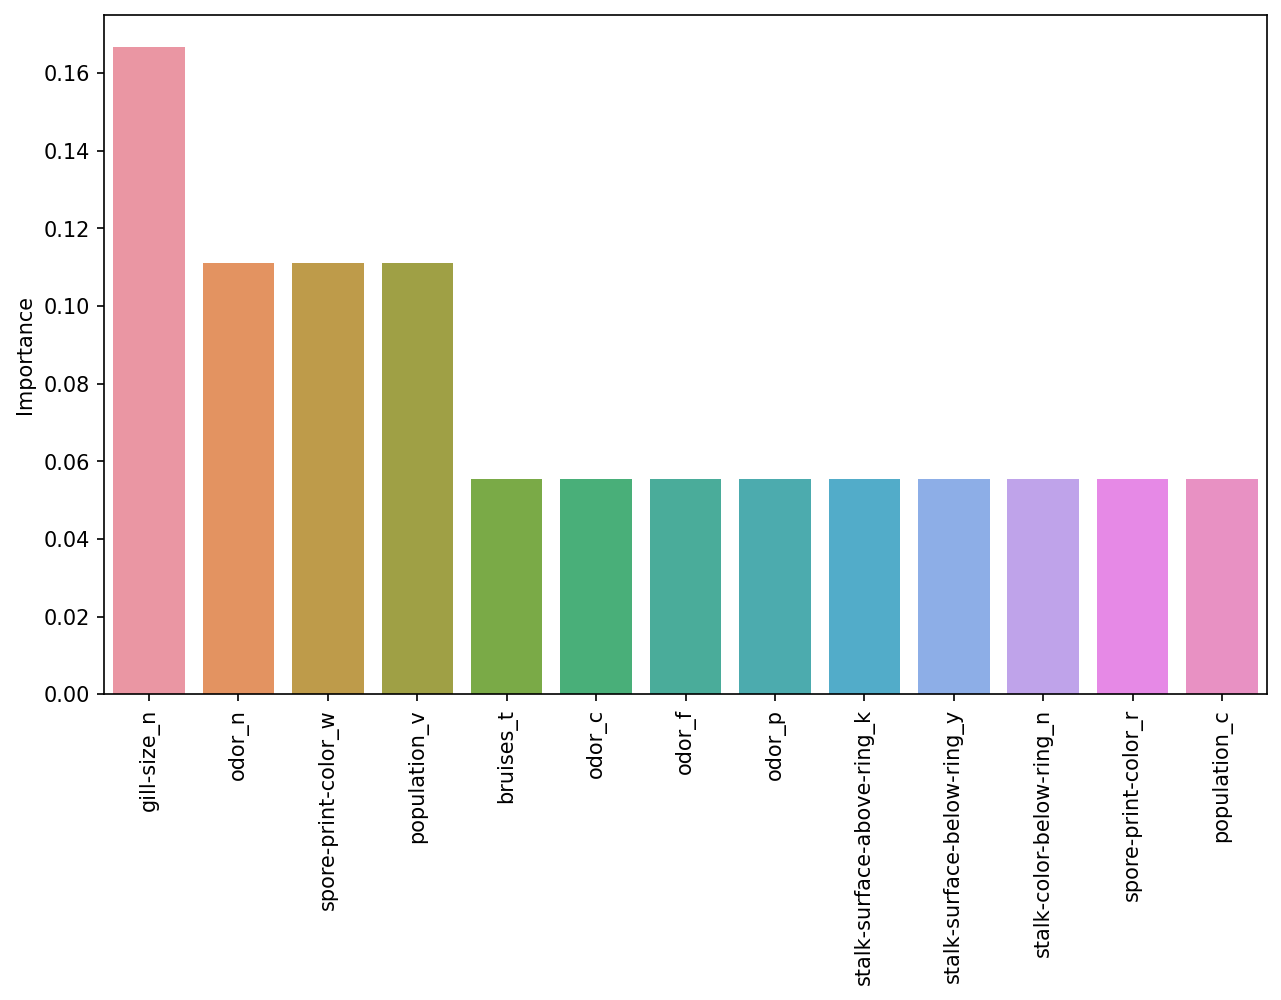

In [65]:
# Criando um DataFrame com as features escolhidas pelo AdaBoost com 18 estimators
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['Importance'])
imp_feats = feats[feats['Importance']>0].sort_values('Importance', ascending=False)

# Plotando a importancia das features
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

# Gradient Boost

In [66]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [68]:
X = pd.get_dummies(df.drop(columns='class'), drop_first=True)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [50,100],
              'learning_rate' : [0.05,0.1,0.2],
              'max_depth' : [3,4,5]}

gb_model = GradientBoostingClassifier()

grid = GridSearchCV(gb_model,param_grid)

grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [72]:
y_pred = grid.predict(X_test)

In [73]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=4)

In [75]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [84]:
feat_import = np.round(grid.best_estimator_.feature_importances_,10)
imp_feat = pd.DataFrame(index=X.columns,
                        data=feat_import,
                        columns=['Importance']).sort_values('Importance',ascending=False)
imp_feat = imp_feat[imp_feat['Importance']>0.0005]
imp_feat

,Importance
odor_n,0.623008
stalk-root_c,0.114329
bruises_t,0.067382
stalk-surface-below-ring_y,0.036852
stalk-root_r,0.031746
spore-print-color_r,0.029901
stalk-root_e,0.023205
odor_p,0.014302
odor_f,0.012807
spore-print-color_h,0.012618


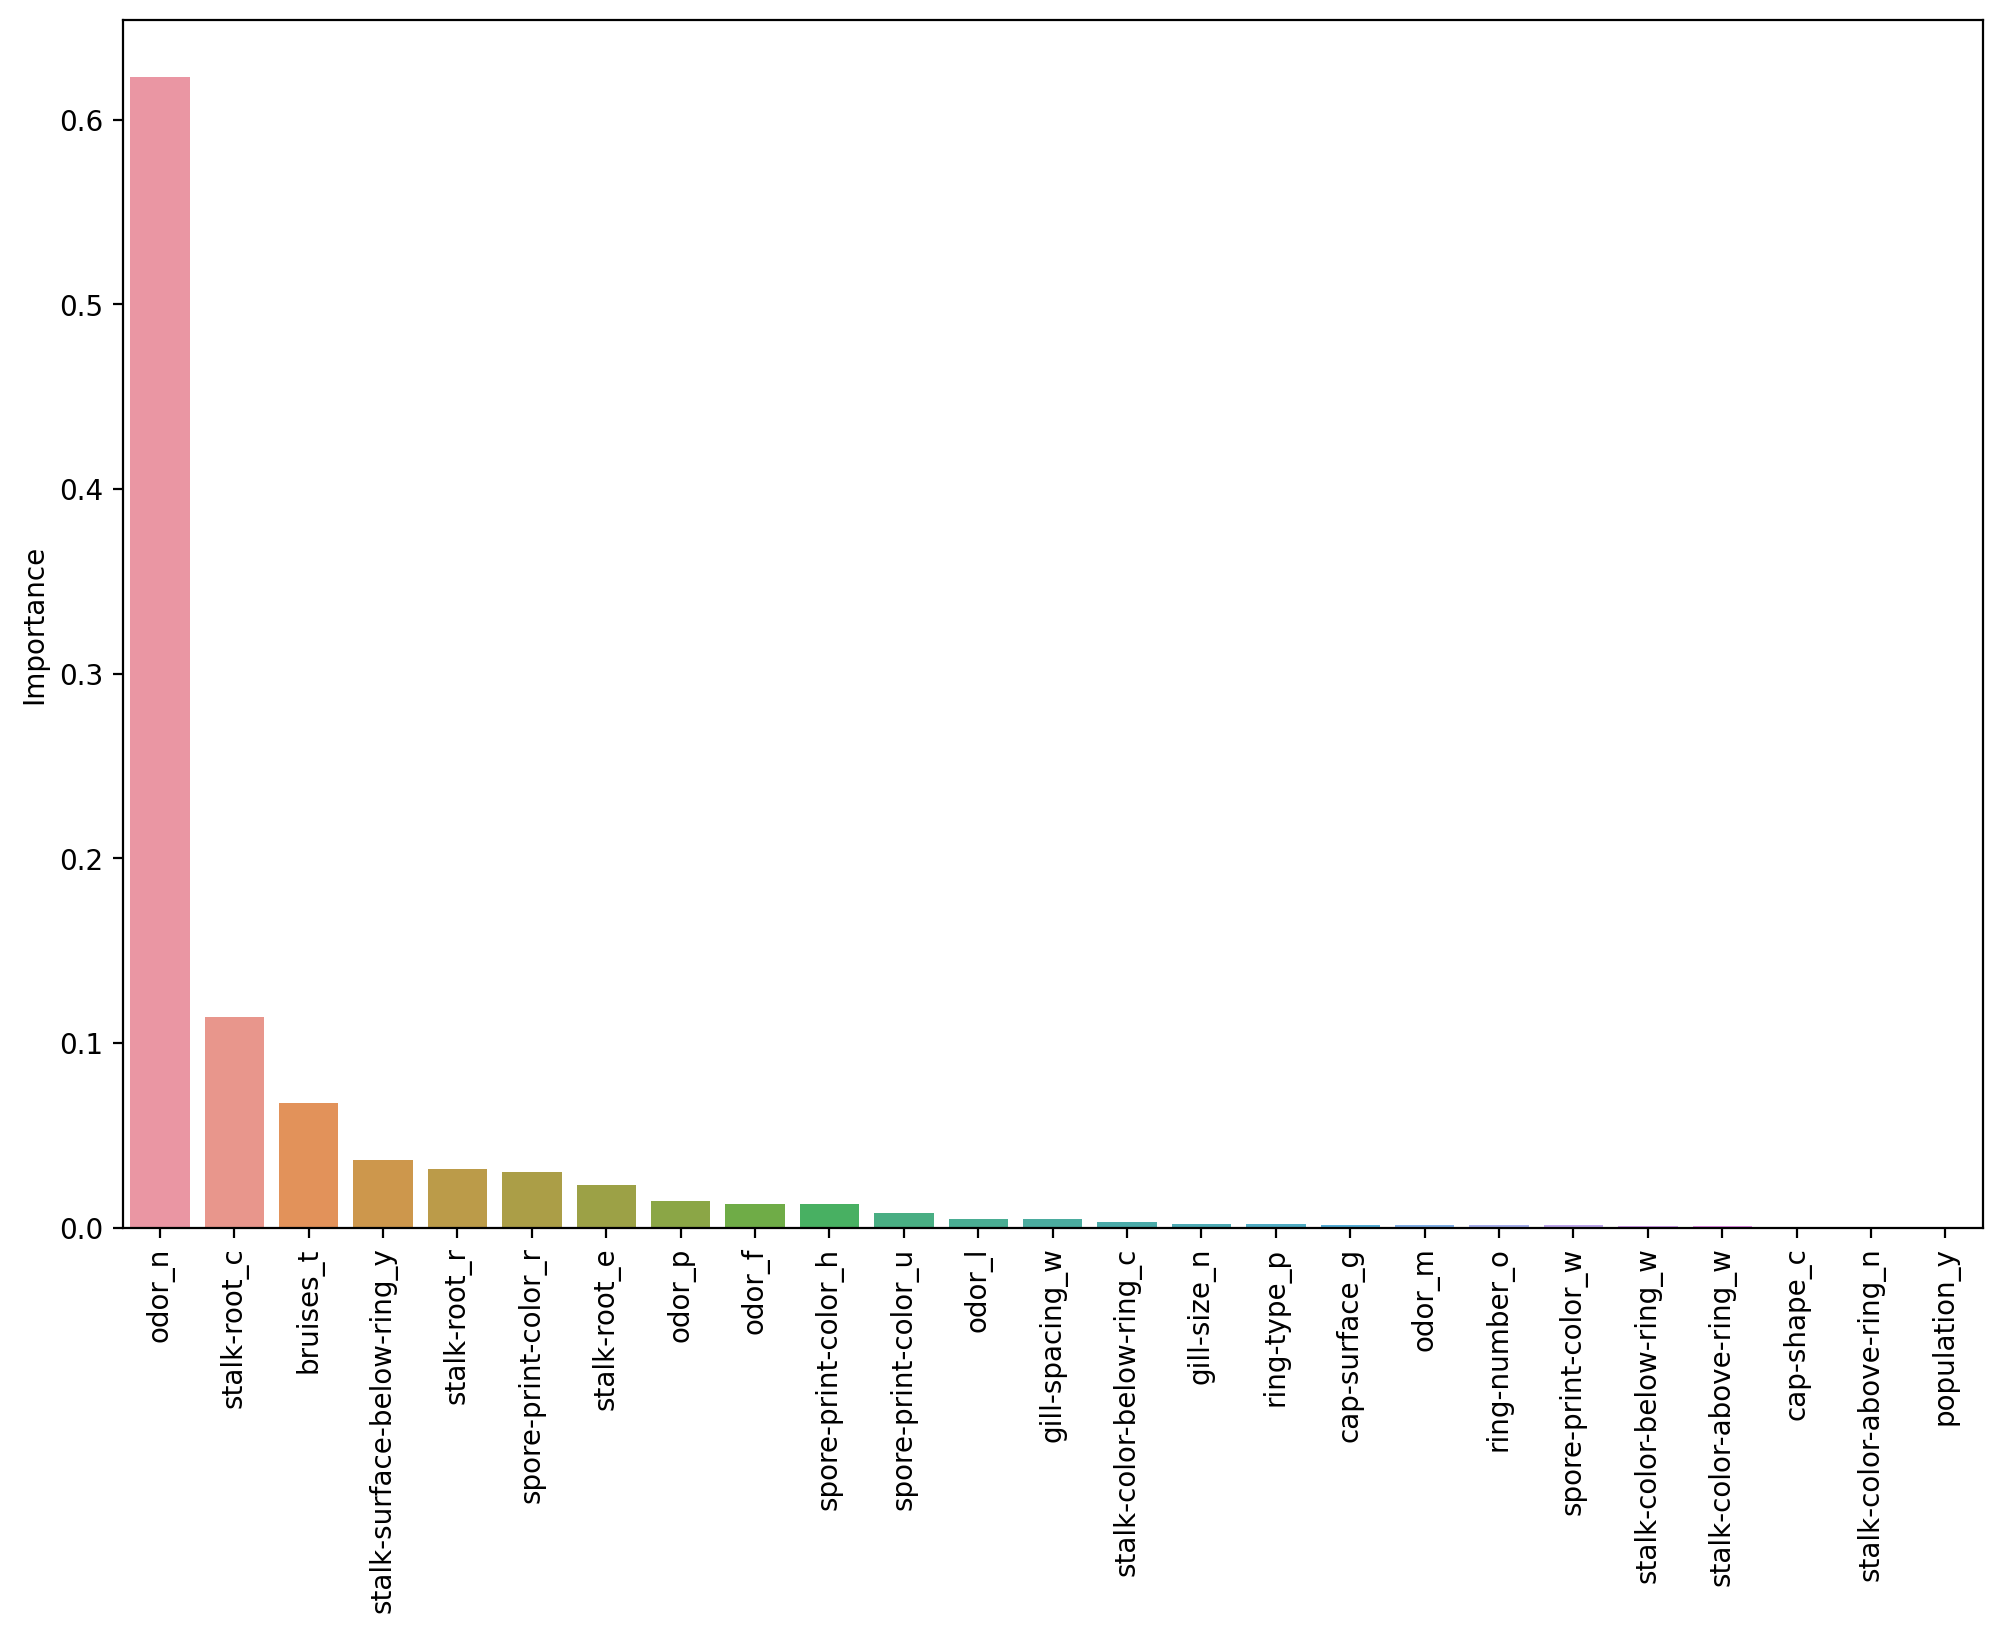

In [89]:
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=imp_feat,
            x=imp_feat.index,
            y='Importance')
plt.xticks(rotation=90);